# Tópico 12 – Distribuições e Amostragem [<img src="images/colag_logo.svg" style="float: right; margin-right: 0%; vertical-align: middle; width: 6.5%;">](https://colab.research.google.com/github/urielmoreirasilva/urielmoreirasilva.github.io/blob/main/aulas/T%C3%B3pico%2012%20%E2%80%93%20Amostragem/12%20%E2%80%93%20Amostragem.ipynb) [<img src="images/github_logo.svg" style="float: right; margin-right: 0%; vertical-align: middle; width: 3.25%;">](https://github.com/urielmoreirasilva/urielmoreirasilva.github.io/blob/main/aulas/T%C3%B3pico%2012%20%E2%80%93%20Amostragem/12%20%E2%80%93%20Amostragem.ipynb)

Os conceitos de "distribuição" e "amostragem" são essenciais na quantificação e no entendimento da aleatoriedade dos dados. Nessa aula, vamos aprender a  como incluir a incerteza do processo de amostragem nos nossos resultados.

### Resultados Esperados

1. Entender o que são distribuições de probabilidade e distribuições empíricas.
1. Aprender sobre a diferença entre populações e amostras.
1. Caracterizar a aleatoriedade em um conjunto de dados como fruto do processo de amostragem.

### Referências
- [CIT, Capítulo 10](https://inferentialthinking.com/)

Material adaptado do [DSC10 (UCSD)](https://dsc10.com/) por [Flavio Figueiredo (DCC-UFMG)](https://flaviovdf.io/fcd/) e [Uriel Silva (DEST-UFMG)](https://urielmoreirasilva.github.io)

In [2]:
# Imports para esse tópico
import numpy as np
import babypandas as bpd
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Opções de como printar objetos do Numpy e do Pandas
np.set_printoptions(threshold = 20, precision = 2, suppress = True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

## Distribuições de probabilidade e distribuições empíricas

### Distribuições de probabilidade

- Seja $X$ uma **variável aleatória** tomando diferentes valores, cada um com uma probabilidade diferente.
- A **distribuição de probabilidade de $X$** descreve:
    - Todos os _possíveis valores_ de $X$;
    - A probabilidade **teórica** de cada um desses valores.

- Uma variável aleatória (v.a.) é um "_característico numérico de um experimento aleatório_", i.e. que associa valores _numéricos_ (em $\mathbb{R}$) a diferentes elementos do _espaço amostral_ ($\Omega$).
    - Por exemplo, no lançamento de uma moeda, o espaço amostral é $\Omega = \{H, T\}$. Podemos definir então uma v.a. $X \in \{0, 1\}$, onde $X = 0$ se a moeda for cara ($H$) e $X = 1$ se a moeda for coroa. Como $P(H) = P(T) = 1/2$, temos também $P(X = 0) = P(X = 1) = 1/2$.

### Exemplo: Distribuição de probabilidade do lançamento de um dado 🎲

- Uma possível v.a. aqui é $X \in \{1, 2, 3, 4, 5, 6\}$, onde cada valor de $X$ têm probabilidade igual a $1/6$.
- A distribuição de $X$ nesse caso é denominada **uniforme**, pois cada um de seus valores (correspondentes à cada face do dado) têm a mesma probabilidade de ocorrência.

In [8]:
die_faces = np.arange(1, 7, 1)
die = bpd.DataFrame().assign(face = die_faces)
die

,face
0,1
1,2
2,3
3,4
4,5
5,6


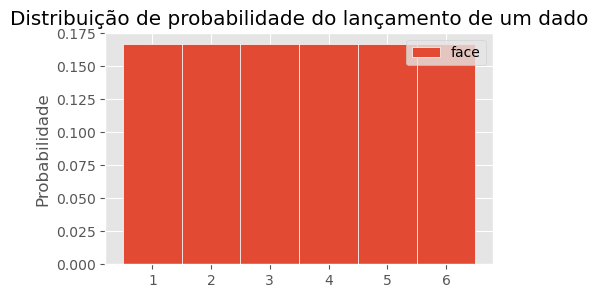

In [9]:
bins = np.arange(0.5, 6.6, 1)

die.plot(kind = 'hist', y = 'face', bins = bins, density = True, ec = 'w', 
         title='Distribuição de probabilidade do lançamento de um dado',
         figsize = (5, 3))

plt.ylabel('Probabilidade');

### Distribuições empíricas

- Ao contrário das distribuições de probabilidade, que por definição são _teóricas_, **as distribuições empíricas** são _baseadas em observações dos dados_.
- Uma **distribuição empírica** descreve:
    - Todos os valores _observados_ de uma variável aleatória $X$.
    - A proporção (ou a **frequência**) dos experimentos com que cada valor ocorreu.

- Usualmente, construímos distribuições empíricas a partir de sucessivas repetições de um experimento.
- Diferentemente das distribuições de probabilidade, as distribuições empíricas representam o que _realmente ocorreu_ na prática. 

### Exemplo: Distribuição empírica do lançamento de um dado 🎲
- Vamos simular o lançamento de um dado 25 vezes utilizando a função `np.random.choice`.
- Para simular o lançamento de um dado, precisamos amostrar **com reposição**.
    - Definiremos "amostragem" e "reposição" mais adiante, mas aqui isso significa que se o resultado do lançamento de um dado for igual a "4", esse valor pode ocorrer mais de uma vez.

In [14]:
## Nota: o resultado dessa função é _estocástico_
## -- execute mais de uma vez e veja o que acontece! :)

num_rolls = 25
many_rolls = np.random.choice(die_faces, num_rolls)
many_rolls

array([2, 2, 2, ..., 6, 4, 5])

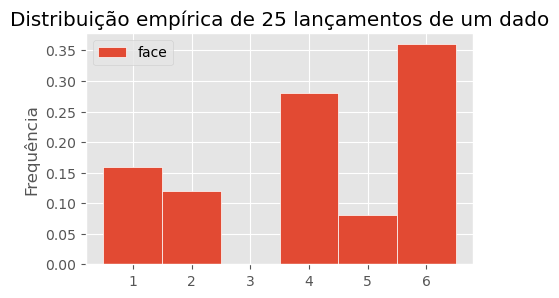

In [15]:
## Nota: o 'f' precede o título do histograma aqui para exibir o valor da variável `num_rolls`, ao invés de uma string "{num_rolls}"  

(bpd.DataFrame()
 .assign(face = many_rolls) 
 .plot(kind = 'hist', y = 'face', bins = bins, density = True, ec = 'w',
       title = f'Distribuição empírica de {num_rolls} lançamentos de um dado',
       figsize=(5, 3))
)
plt.ylabel('Frequência');

#### "Muitos" lançamentos de um dado 🎲

Agora, o que acontece quando aumentamos o número de lançamentos?

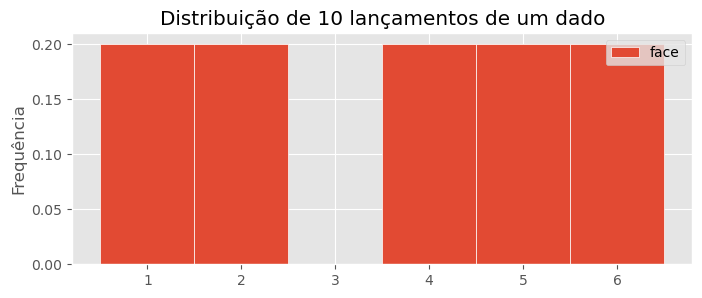

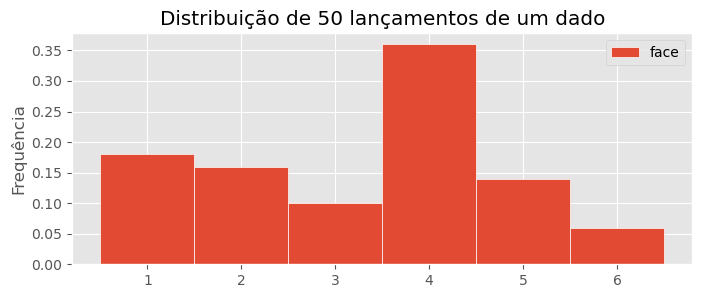

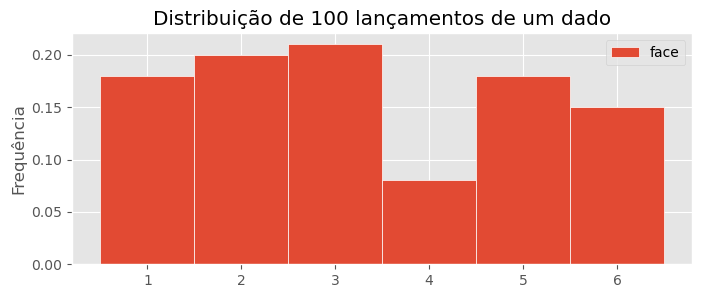

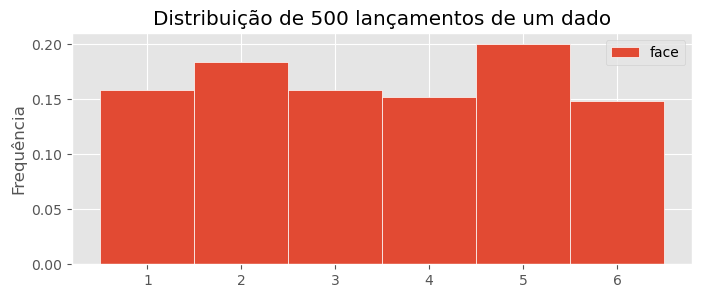

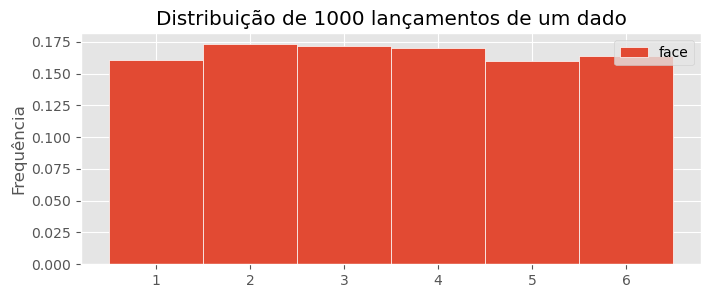

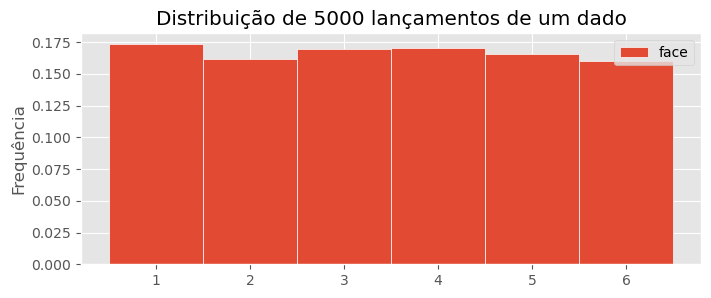

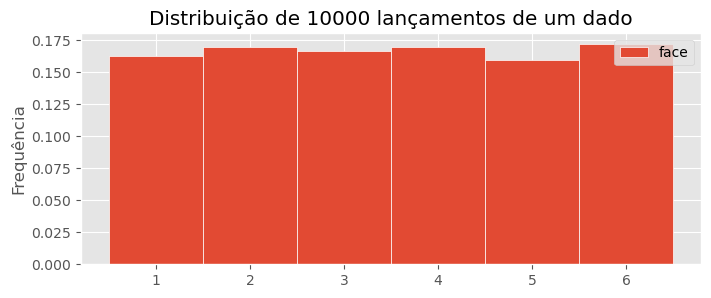

In [17]:
for num_rolls in [10, 50, 100, 500, 1000, 5000, 10000]:
    # Simulando os `num_rolls` lançamentos de um dado
    many_rolls = np.random.choice(die_faces, num_rolls)
    # Elaborando o histograma correspondente
    (bpd.DataFrame()
     .assign(face = many_rolls)
     .plot(kind = 'hist', y = 'face', bins = bins, density = True, ec = 'w', 
           title = f'Distribuição de {num_rolls} lançamentos de um dado',
           figsize=(8, 3))
    )
    plt.ylabel('Frequência')

#### ... e porque isso acontece? ⚖️

A **Lei dos Grandes Números** diz que, se um experimento aleatório for repetido 
1. um _grande número_ de vezes,
1. _independentemente_,
1. e _sobre as mesmas condições_,

então a **proporção** do número de vezes que um evento ocorre se aproxima cada vez mais da **probabilidade teórica** desse evento.

- Por exemplo, à medida que lançamos um dado repetidas vezes, a proporção de vezes que obtemos um "5" chega cada vez mais perto de $1/6$.

- A Lei dos Grandes Números **essencialmente garante que o uso de simulações para aproximar distribuições de probabilidade esteja correto**!

## Amostragem

### Populações e amostras

- Uma **população** é um grupo _completo_ de pessoas, objetos, eventos, etc. sobre o qual queremos aprender algo.

- Na prática, frequentemente não é possível obter informações sobre _todos_ os membros de uma população.

- Nessas situações, tipicamente coletamos uma **amostra**, isto é, um subconjunto da população.

- Com base na amostra coletada, podemos então **estimar** alguma quantidade de interesse da população.

### Estratégias de amostragem

- **Problema principal**: Como coletar uma "boa amostra", isto é, tal que a **distribuição empírica** (a distribuição da amostra) seja o mais parecida possível com a **distribuição populacional** (a distribuição da população)?

- **Má ideia ❌**: Amostrar os indivíduos mais "próximos"/"fáceis"
   - Por exemplo, seus colegas de classe, as pessoas em uma fila de supermercado, etc.
   - Esse tipo de amostra é conhecido como _amostra de conveniência_.
   - Amostras de conveniência usualmente contém fontes ocultas de **viés**.

- **Boa ideia ✔️**: Selecionar indivíduos da população de maneira _aleatória_. 

### Amostragem aleatória simples

Uma **amostra aleatória simples** é uma amostra coletada de maneira **uniforme**, **aleatória** e **sem reposição**.
   - "Uniforme" significa que cada indivíduo têm a mesma probabilidade de ser selecionado.
   - "Sem reposição" significa que o mesmo indivíduo não pode ser selecionado mais de uma vez.

### Amostragem de uma lista ou array

Para gerar uma amostra aleatória simples de tamanho `n` de uma lista ou array `population`, utilizamos a função `np.random.choice(population, n, replace = False)`.

In [34]:
## Exemplo: array de universidades
colleges = np.array(['UFMG', 'USP', 'UEMG', 
                     'UNICAMP', 'UFRJ', 'UFPB', 
                     'UFSCar', 'UFSC', 'UFRGS'])

## Amostragem aleatória simples de 3 elementos de `colleges`
## Nota: execute essa célula mais de uma vez e compare os resultados!
np.random.choice(colleges, 3, replace = False)

array(['UFRGS', 'USP', 'UFSC'], dtype='<U7')

Se declararmos `replace = True`, então estaremos amostrando uniformemente _com reposição_.

### Exemplo: Atrasos de vôos ✈️

Para esse exemplo, o DataFrame `united_full` contém informação sobre todos os vôos da United Airlines saindo de SFO (San Francisco International Airport) entre 01/06/2015 e 31/08/2015.

Para o restante dessa aula, assuma que essa base de dados seja a nossa _população_.

In [37]:
united_full = bpd.read_csv('data/united_summer2015.csv')
united_full

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
...,...,...,...,...
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1
13824,8/31/15,2013,EWR,-2


#### Amostrando linhas de um DataFrame

Para amostrar linhas de um DataFrame, podemos usar o método `.sample`. 

Mais especificamente,

```py
df.sample(n)
```

retorna um subconjunto aleatório  de `n` linhas de `df`, amostradas **sem reposição** (o padrão dessa função é `replace = False`, diferente de `np.random.choice`, em que o padrão é amostrar **com reposição**).

In [39]:
## 5 vôos escolhidos aleatoriamente, *sem* reposição
united_full.sample(5)

,Date,Flight Number,Destination,Delay
3259,6/22/15,1668,ORD,0
164,6/2/15,358,LAS,-8
9212,8/1/15,384,PHL,-6
5617,7/8/15,1674,EWR,92
1790,6/12/15,1728,ATL,10


In [40]:
## 5 vôos escolhidos aleatoriamente, *com* reposição
united_full.sample(5, replace = True)

,Date,Flight Number,Destination,Delay
9814,8/5/15,394,LAS,-3
3273,6/22/15,1727,IND,-5
11055,8/13/15,229,IAH,30
11125,8/13/15,1124,SEA,-2
8279,7/26/15,500,ORD,2


**Nota**: A probabilidade de observarmos a mesma linha mais de uma vez ao reamostrarmos com reposição nesse caso é muito baixa, uma vez que aqui o tamanho amostral (5 elementos) é _pequeno_ relativo ao tamanho da população (13.825 elementos).

### O efeito do tamanho amostral

- A Lei dos Grandes Números diz que, à medida que aumentamos o número de repetições de um experimento aleatório, a distribuição empírica se aproxima cada vez mais da distribuição de probabilidade verdadeira (populacional).

- **Como consequência, em um processo de amostragem aleatória simples, quanto maior o nosso tamanho amostral, melhor será nossa aproximação da distribuição de probabilidade populacional.**
- Tecnicalidades à parte, uma maneira intuitiva de entender esse ponto é enxergar que, como as amostras aleatórias simples são independentes e vêm da mesma população, uma amostra grande pode ser sempre decomposta em várias amostras pequenas.

#### Distribuição populacional dos atrasos de vôos ✈️

Aqui estamos interessados apenas nos `'Delay'`s, e logo selecionaremos apenas essa coluna.

Note que os atrasos de vôos estão expressos em **minutos**, e um "atraso" negativo significa que o vôo na verdade foi adiantado.

In [47]:
united = united_full.get(['Delay'])
united

,Delay
0,257
1,28
2,-3
...,...
13822,3
13823,-1
13824,-2


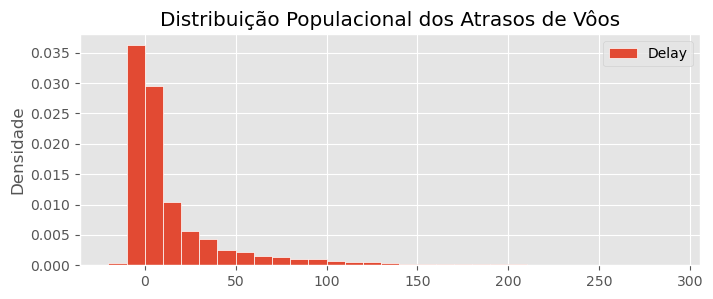

In [48]:
bins = np.arange(-20, 300, 10)
united.plot(kind = 'hist', y = 'Delay', bins = bins, density = True, ec = 'w', 
            title='Distribuição Populacional dos Atrasos de Vôos', figsize = (8, 3))
plt.ylabel('Densidade');

**Nota**: como a população contém _todos_ os valores nos quais estamos interessados, dizemos que a distribuição populacional é **determinística**, ou "fixa".,

Em outras palavras, supondo que o universo de **todos** os possíveis valores nos quais estamos interessados seja **conhecido**, **não existe aleatoriedade** como em um processo de amostragem.

No processo de amostragem (que é sujeito à aleatoriedade), a distribuição empírica é dita ser "variável", ou **estocástica**.

#### Distribuição empírica dos atrasos de vôos ✈️

- Aqui, nossa população é composta dos 13.825 atrasos de vôos (`Delay`'s) no DataFrame `united`.
- Em geral, porém, raramente temos acesso à população inteira.
- Para replicar uma situação prática real, vamos reamostrar de `united` **sem reposição**.

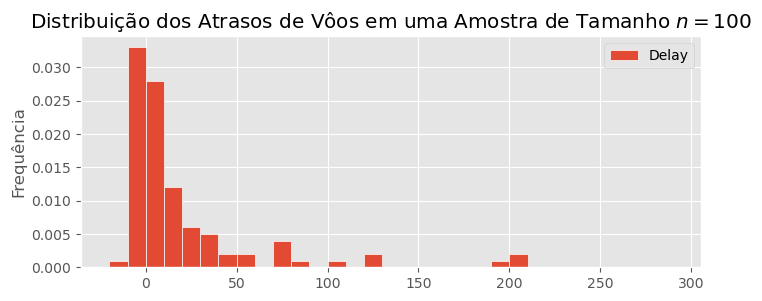

In [51]:
## Nota: o resultado da função abaixo é estocástico!

sample_size = 100 # Mude esse valor e veja o que acontece!
(united
 .sample(sample_size)
 .plot(kind = 'hist', y = 'Delay', bins = bins, density = True, ec = 'w',
       title = f'Distribuição dos Atrasos de Vôos em uma Amostra de Tamanho $n = {sample_size}$',
       figsize = (8, 3))
)
plt.ylabel('Frequência');

Intuitivamente, à medida em que aumentamos o tamanho amostral $n$ (`sample_size`), a distribuição empírica dos atrasos fica _cada vez mais próxima_ da distribuição populacional!

## Parâmetros e estatísticas

### Definições

- **Inferência estatística** é o ato de se tirar conclusões sobre uma população com base nas informações de uma amostra aleatória.

- **Parâmetro**: Uma quantidade de interesse da população.
    - Exemplo 1: A média populacional.
    - Exemplo 2: A proporção populacional.

- **Estatística**: Uma quantidade _calculada_ com base na amostra.
    - Exemplo 1: A média amostral.
    - Exemplo 2: A proporção amostral.

- Uma estatística pode ser utilizada para **estimar** um parâmetro.
  - Como uma função matemática teórica, diz-se que uma estatística nesse caso é um **estimador** para esse parâmetro.
  - Após coletarmos uma amostra, o _valor_ correspondente que a estatística/estimador toma é então uma **estimativa** para o parâmetro.

#### Média dos atrasos de vôos ✈️

**Pergunta**: Qual foi a média de atraso entre _todos_ os vôos da United saindo de SFO no verão de 2015? 🤔

- Em geral, gostaríamos de saber a média dos atrasos de vôos na **população** (nosso _parâmetro_), mas na prática teremos disponível apenas uma **amostra**.

- É natural então perguntarmos: como a média dos atrasos dos vôos na **amostra** (isto é, a _estatística_) se compara à média dos atrasos dos vôos na  **população** (nosso _parâmetro_)?

### Média populacional

- A **média populacional** é um **parâmetro**.
- A média populacional também é determinística/fixa, _assim como qualquer outro parâmetro_. 
- Como quase nunca temos acesso à população completa, em geral não podemos saber com exatidão os valores dos parâmetros sobre os quais estamos interessados.
    - Em outras palavras, embora os parâmetros sejam _fixos_, em geral eles também são _desconhecidos_.

No nosso exemplo, a média populacional é dada por:

In [65]:
## Média *populacional*
united_mean = united.get('Delay').mean()
united_mean

16.658155515370705

### Média amostral

- A **média amostral** é uma **estatística**.
- Como estatísticas são funções da amostra (e que por definição é _aleatória_), a média amostral **também é aleatória**.

No nosso exemplo, se coletarmos uma amostra de tamanho $n$ = `sample_size`, a média amostral correspondente é dada por:

In [68]:
## Média amostral com n = 100
## Execute essa célula mais de uma vez!

sample_size = 100
united.sample(sample_size).get('Delay').mean()

17.84

- Cada vez que executamos a célula acima, nós estamos:
    1. Coletando uma nova amostra aleatória de tamanho $n$ = `sample_size`;
    1. Calculando a média amostral correspondente.

- Note que, a cada execução, a média amostral é _ligeiramente diferente_.
    - Algumas vezes, a média amostral é _próxima_ da média populacional.
    - Outras vezes, a média amostral é _distante_ da média populacional.

#### O efeito do tamanho amostral

E se coletarmos um tamanho de amostra maior?

In [72]:
## Média amostral com n = 1000

sample_size = 1000
united.sample(sample_size).get('Delay').mean()

17.315

- Cada vez que executamos a célula acima, os resultados ainda são _ligeiramente diferentes_ da média populacional.
- Entretanto, se compararmos à situação anterior em que $n = 100$, as médias amostrais agora são _muito mais próximas entre si_ – e também _mais próximas à média populacional_.
- **Em geral**, estatísticas calculadas com base em amostras **maiores** são estimadores **melhores** dos parâmetros da população do que quando calculadas em amostras menores.

**Tamanhos de amostra menores**:<center><img src='data/bullseye-high.png' width=300></center>

**Tamanhos de amostra maiores**:<center><img src='data/bullseye-low.png' width=300></center>

### Distribuição de probabilidade de uma estatística

- O valor numérico de uma estatística (por exemplo a média amostral) é _aleatório_, porque é calculado com base em uma amostra (que é aleatória).
    - Mais formalmente, **estatísticas também são variáveis aleatórias**.

- Assim como fazemos para variáveis aleatórias em geral, podemos analisar a distribuição de probabilidade _de uma estatística_ na qual estamos interessados.
    - Essa distribuição é conhecida como **distribuição amostral**.

- A distribuição amostral descreve a probabilidade de todos os possíveis valores de uma estatística.
- **A distribuição amostral é útil para caracterizar o quão provável é o valor da estatística em uma amostra particular**.
- De maneira análoga, a distribuição amostral nos permite dizer o quanto o valor da nossa estatística _poderia ter sido_ caso tívessemos coletado uma amostra diferente.

- Temos basicamente 2 maneiras de caracterizarmos uma distribuição amostral:
    - Opção 1: Desenvolver uma expressão ou aproximação **analítica** utilizando Matemática e Probabilidade (nem sempre isso é possível!).
    - Opção 2: Utilizar simulação e gerar diferentes amostras da nossa população, calculando o valor da estatística para cada amostra.

- Nesse curso, focaremos na Opção 2, e utilizaremos simulação para aproximar a distribuição amostral das estatísticas nas quais estamos interessados.
    - A Opção 1 será o assunto de vários cursos de Estatística e Probabilidade que vocês terão mais adiante!

### Distribuição amostral empírica

- A _distribuição amostral empírica_ é obtida com base nos valores simulados de uma estatística.
- Essa distribuição descreve:    
    - Todos os valores _observados_ da estatística.
    - A frequência/proporção de amostras em que cada valor foi observado.

- Em geral, a distribuição empírica de uma estatística se torna uma aproximação cada vez melhor para a verdadeira distribuição amostral **à medida que o número de repetições da simulação é cada vez maior**.

### Distribuição amostral empírica da média amostral

- Para entendermos o quão diferente o valor da média amostral pode ser em diferentes amostras, podemos fazer o seguinte:
    1. Coletar muitas amostras aleatoriamente;
    1. Calcular a média amostral em cada uma dessas amostras;
    1. Elaborar um histograma com os valores obtidos.

Retornando ao nosso exemplo, vamos proceder da maneira descrita acima, gerando $M = 2.000$ amostras de tamanho $n = 100$:

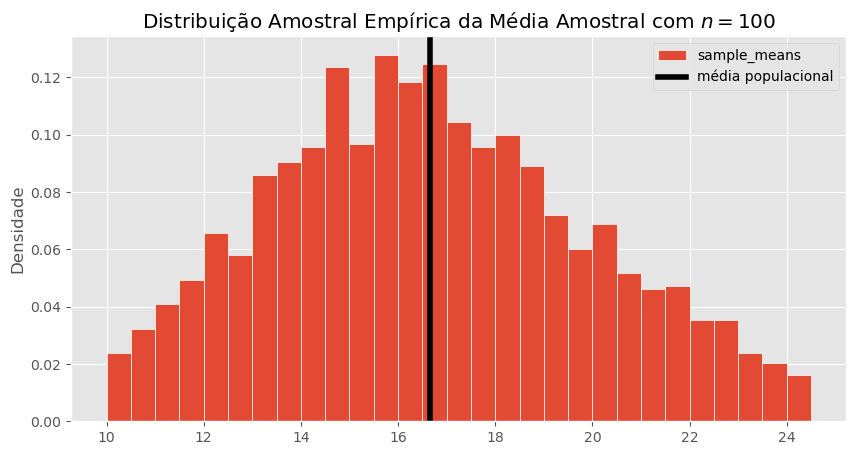

In [88]:
## Inicialização
sample_size = 100
repetitions = 2000
sample_means = np.array([])

## Coletando amostras, calculando médias amostrais e agregando ao array
for n in np.arange(repetitions):
    m = united.sample(sample_size).get('Delay').mean()
    sample_means = np.append(sample_means, m)

## Elaborando um histograma com a distribuição empírica das médias amostrais
bpd.DataFrame().assign(sample_means = sample_means) \
               .plot(kind = 'hist', bins = np.arange(10, 25, 0.5), density = True, ec = 'w',
                     title = f'Distribuição Amostral Empírica da Média Amostral com $n = {sample_size}$',
                     figsize = (10, 5));    
plt.axvline(x = united_mean, c = 'black', linewidth = 4, label = 'média populacional')
plt.legend()
plt.ylabel('Densidade');

#### Mas afinal, por que calcular a distribuição amostral empírica de uma estatística?

- Na prática, coletamos apenas _uma_ amostra da população, da qual calculamos apenas _um_ valor da estatística de interesse.
    - Em certos casos, a amostra _pode_ ser suficientemente representativa da população, e o valor da estatística será próximo ao parâmetro que estamos tentando estimar.
    - Quando isso não acontece, porém, o valor da estatística pode ser bem diferente do parâmetro de interesse!

- Dessa forma, a distribuição amostral empírica de uma estatística nos ajuda a responder à seguinte pergunta: **qual seria o valor da estatística caso tívessemos coletado uma amostra diferente?**

#### E qual o papel do tamanho amostral nesse processo?

- Em geral, um tamanho amostral maior essencialmente faz com que a distribuição amostral da estatística correspondente seja **menos dispersa**, isto é, **menos variável**, em torno do verdadeiro valor do parâmetro populacional.
    - Em outras palavras, cada valor da estatística calculada com um tamanho de amostra de maior é uma estimativa **mais precisa** para o parâmetro de interesse.

Retornando mais uma vez ao nosso exemplo dos atrasos de vôos, veja o que acontece se continuarmos gerando $M = 2.000$ amostras, mas agora de tamanho $n = 1.000$:

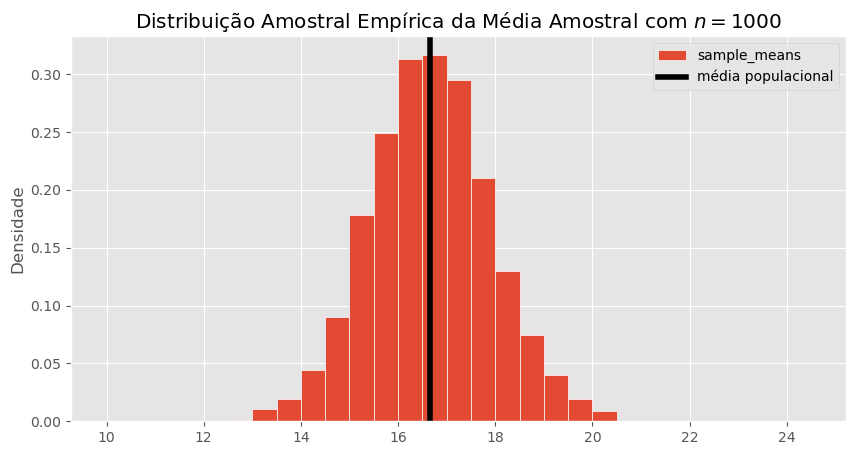

In [94]:
## Inicialização
sample_size = 1000
repetitions = 2000
sample_means = np.array([])

## Amostrando, calculando médias amostrais e agregando ao array
for n in np.arange(repetitions):
    m = united.sample(sample_size).get('Delay').mean()
    sample_means = np.append(sample_means, m)

## Elaborando um histograma com a distribuição empírica das médias amostrais
bpd.DataFrame().assign(sample_means = sample_means) \
               .plot(kind = 'hist', bins = np.arange(10, 25, 0.5), density = True, ec = 'w',
                     title = f'Distribuição Amostral Empírica da Média Amostral com $n = {sample_size}$',
                     figsize = (10, 5));    
plt.axvline(x = united_mean, c = 'black', linewidth = 4, label = 'média populacional')
plt.legend()
plt.ylabel('Densidade');

### Exercício ✅

Na célula acima, geramos amostras de vôos de tamanho $n = 1.000$ um número $B = 2.000$ de vezes. Se ao invés disso continuarmos gerando $B = 2.000$ amostras, mas agora tomando amostras de tamanho $n = 10.000$, qual você acha que será o efeito sobre a distribuição empírica da média amostral? 

A.  A distribuição empírica ficará "mais estreita" (menos dispersa).

B.  A distribuição empírica ficará "mais larga" (mais dispersa).

C.  A distribuição empírica será deslocada para a esquerda.

D.  A distribuição empírica será deslocada para a direita.

E.  Nenhum efeito.

## Resumo

- A **distribuição de probabilidade** de uma _variável aleatória_ descreve a probabilidade de cada possível valor dessa variável.
- Uma **distribuição empírica** descreve a frequência/proporção com a qual cada valor de um experimento aleatório ocorre.
    - Quanto mais repetimos o experimento aleatório, mais a distribuição empírica se aproxima da distribuição de probabilidade.
- Um **parâmetro** é uma quantidade de interesse da **população**, enquanto uma **estatística** é uma quantidade de interesse da **amostra**.
- Em geral, podemos utilizar estatísticas para **estimar** parâmetros da população.
    - Por exemplo, para estimar a média populacional, podemos utilizar a média amostral.
    - Usualmente, amostras de tamanhos maiores levam à estimativas mais precisas.
- Uma **distribuição amostral** descreve a probabilidade de cada possível valor de uma estatística de interesse.
    - A distribuição amostral é importante na caracterização da **incerteza sobre uma estimativa**. 